# End-to-End SaaS Growth, Churn & Cohort Analysis using Python, SQL & Power BI

## Introduction About DATA

This project uses a synthetic SaaS dataset representing RavenStack, a fictional AI-powered collaboration platform.
The dataset is designed to closely mimic real-world SaaS data structures, making it suitable for practicing data analysis, SQL querying, and business intelligence workflows.

The data is provided across five relational CSV files, each capturing a different aspect of the customer lifecycle:

Accounts – customer profile information such as industry, country, signup date, plan tier, and trial status

Subscriptions – subscription lifecycle details including billing cycle, revenue, discounts, and active status

Feature Usage – daily product interaction logs showing feature adoption, usage frequency, and engagement metrics

Support Tickets – customer support activity including ticket categories, resolution time, escalation status, and satisfaction scores

Churn Events – churn dates, churn reasons, refund behavior, and reactivation indicators

Together, these tables enable analysis of customer growth, product engagement, revenue performance, support impact, churn behavior, and retention patterns. The dataset supports time-based and cohort analysis and includes realistic edge cases to simulate real SaaS business scenarios.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
accounts_df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Data set .csv\Raven_stack subscription analysis\ravenstack_accounts.csv")
accounts_df

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag
0,A-2e4581,Company_0,EdTech,US,16-10-2024,partner,Basic,9,False,False
1,A-43a9e3,Company_1,FinTech,IN,17-08-2023,other,Basic,18,False,True
2,A-0a282f,Company_2,DevTools,US,27-08-2024,organic,Basic,1,False,False
3,A-1f0ac7,Company_3,HealthTech,UK,27-08-2023,other,Basic,24,True,False
4,A-ce550d,Company_4,HealthTech,US,27-10-2024,event,Enterprise,35,False,True
...,...,...,...,...,...,...,...,...,...,...
495,A-8ae3fc,Company_495,DevTools,CA,28-06-2024,ads,Pro,9,False,False
496,A-55f257,Company_496,FinTech,US,21-12-2023,organic,Basic,9,False,False
497,A-d26ab4,Company_497,DevTools,UK,07-11-2024,organic,Basic,9,False,True
498,A-712533,Company_498,EdTech,US,31-07-2023,organic,Pro,18,False,False


In [6]:
subcriptions_df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Data set .csv\Raven_stack subscription analysis\ravenstack_subscriptions.csv")
subscriptions_df

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag
0,S-8cec59,A-3c1a3f,23-12-2023,12-04-2024,Enterprise,14,2786,33432,False,False,False,True,monthly,True
1,S-0f6f44,A-9b9fe9,11-06-2024,NaN,Pro,17,833,9996,False,False,False,False,monthly,True
2,S-51c0d1,A-659280,25-11-2024,NaN,Enterprise,62,0,0,True,True,False,False,annual,False
3,S-f81687,A-e7a1e2,23-11-2024,13-12-2024,Enterprise,5,995,11940,False,False,False,True,monthly,True
4,S-cff5a2,A-ba6516,10-01-2024,NaN,Enterprise,27,5373,64476,False,False,False,False,monthly,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S-c158df,A-fa2041,27-10-2024,NaN,Enterprise,18,3582,42984,False,False,False,False,monthly,True
4996,S-b49c0a,A-db5e9e,05-12-2024,NaN,Pro,23,1127,13524,False,False,False,False,monthly,False
4997,S-42822d,A-443f6f,15-12-2024,NaN,Pro,25,1225,14700,False,False,False,False,annual,True
4998,S-432401,A-c7ffc2,25-05-2023,NaN,Pro,132,6468,77616,False,False,False,False,monthly,True


In [7]:
feature_usage_df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Data set .csv\Raven_stack subscription analysis\ravenstack_feature_usage.csv")
feature_usage_df

,usage_id,subscription_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature
0,U-1c6c24,S-0fcf7d,27-07-2023,feature_20,9,5004,0,False
1,U-f07cb8,S-c25263,07-08-2023,feature_5,9,369,0,False
2,U-096807,S-f29e7f,07-12-2023,feature_3,9,1458,0,False
3,U-6b1580,S-be655e,28-07-2024,feature_40,5,2085,0,False
4,U-720a29,S-f9b1d0,02-12-2024,feature_12,12,900,0,False
...,...,...,...,...,...,...,...,...
24995,U-134479,S-c249fb,08-07-2023,feature_16,7,4116,0,False
24996,U-2031ad,S-b83d8d,29-03-2023,feature_31,8,2240,1,False
24997,U-dd4ffc,S-ad7716,03-10-2024,feature_5,5,2745,0,False
24998,U-49d9e1,S-dbad62,25-06-2024,feature_5,7,1715,0,False


In [8]:
churn_events_df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Data set .csv\Raven_stack subscription analysis\ravenstack_churn_events.csv")
churn_events_df

,churn_event_id,account_id,churn_date,reason_code,refund_amount_usd,preceding_upgrade_flag,preceding_downgrade_flag,is_reactivation,feedback_text
0,C-816288,A-c37cab,27-10-2024,pricing,4.03,False,False,False,switched to competitor
1,C-5a81e7,A-37f969,25-06-2024,support,96.45,True,False,False,NaN
2,C-a174be,A-b07346,12-11-2024,budget,0.00,False,False,False,missing features
3,C-accb39,A-1e50e0,01-11-2023,budget,54.94,False,False,False,switched to competitor
4,C-92f889,A-956988,30-12-2024,unknown,0.00,False,True,True,too expensive
...,...,...,...,...,...,...,...,...,...
595,C-b56a35,A-702032,14-06-2024,competitor,0.00,False,False,False,switched to competitor
596,C-7e7822,A-dbc825,03-02-2024,budget,0.00,False,False,False,NaN
597,C-484fba,A-0a282f,31-12-2024,support,62.66,False,True,False,too expensive
598,C-22f536,A-e5d6ab,11-05-2024,competitor,0.00,True,False,False,NaN


In [9]:
support_tickets_df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Data set .csv\Raven_stack subscription analysis\ravenstack_supports_ticket.csv")
support_tickets_df

,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,escalation_flag
0,T-0024de,A-712f1c,27-07-2023,28-07-2023 03:00,27,high,74,NaN,False
1,T-4d04b9,A-e43bf7,08-07-2024,09-07-2024 03:00,27,urgent,144,NaN,False
2,T-d5e12f,A-0f3e88,17-10-2024,17-10-2024 19:00,19,urgent,93,4.0,False
3,T-dfce9a,A-4c56c9,08-09-2024,09-09-2024 23:00,47,medium,126,5.0,False
4,T-c59f77,A-6f8ad2,30-11-2024,01-12-2024 02:00,26,medium,8,NaN,False
...,...,...,...,...,...,...,...,...,...
1995,T-d9d697,A-417d2f,06-11-2024,08-11-2024 22:00,70,urgent,3,NaN,False
1996,T-a9918a,A-b20d99,12-02-2023,14-02-2023 15:00,63,low,22,3.0,False
1997,T-e3c91a,A-d3c88e,29-04-2023,02-05-2023 00:00,72,high,16,4.0,False
1998,T-91c983,A-dfbd31,23-05-2023,23-05-2023 03:00,3,high,177,5.0,False


In [10]:
print(accounts_df.shape)
print(subscriptions_df.shape)
print(feature_usage_df.shape)
print(churn_events_df.shape)
print(support_tickets_df.shape)

(500, 10)
(5000, 14)
(25000, 8)
(600, 9)
(2000, 9)


## DATA CLEANING 

In [11]:
print(accounts_df.dtypes)

account_id         object
account_name       object
industry           object
country            object
signup_date        object
referral_source    object
plan_tier          object
seats               int64
is_trial             bool
churn_flag           bool
dtype: object


In [12]:
accounts_df["signup_date"] = pd.to_datetime(accounts_df["signup_date"])


In [13]:
print(accounts_df.dtypes)

account_id                 object
account_name               object
industry                   object
country                    object
signup_date        datetime64[ns]
referral_source            object
plan_tier                  object
seats                       int64
is_trial                     bool
churn_flag                   bool
dtype: object


In [14]:
print(subscriptions_df.dtypes)

subscription_id      object
account_id           object
start_date           object
end_date             object
plan_tier            object
seats                 int64
mrr_amount            int64
arr_amount            int64
is_trial               bool
upgrade_flag           bool
downgrade_flag         bool
churn_flag             bool
billing_frequency    object
auto_renew_flag        bool
dtype: object


In [18]:
subscriptions_df["end_date"] = pd.to_datetime(
    subscriptions_df["end_date"],
    dayfirst=True
)


In [19]:
subscriptions_df["start_date"] = pd.to_datetime(
    subscriptions_df["start_date"],
    dayfirst=True
)


In [20]:
print(subscriptions_df.dtypes)

subscription_id              object
account_id                   object
start_date           datetime64[ns]
end_date             datetime64[ns]
plan_tier                    object
seats                         int64
mrr_amount                    int64
arr_amount                    int64
is_trial                       bool
upgrade_flag                   bool
downgrade_flag                 bool
churn_flag                     bool
billing_frequency            object
auto_renew_flag                bool
dtype: object


In [21]:
print(feature_usage_df.dtypes)

usage_id               object
subscription_id        object
usage_date             object
feature_name           object
usage_count             int64
usage_duration_secs     int64
error_count             int64
is_beta_feature          bool
dtype: object


In [22]:
feature_usage_df["usage_date"] = pd.to_datetime(
    feature_usage_df["usage_date"],
    dayfirst=True
)

In [23]:
print(feature_usage_df.dtypes)

usage_id                       object
subscription_id                object
usage_date             datetime64[ns]
feature_name                   object
usage_count                     int64
usage_duration_secs             int64
error_count                     int64
is_beta_feature                  bool
dtype: object


In [24]:
print(churn_events_df.dtypes)

churn_event_id               object
account_id                   object
churn_date                   object
reason_code                  object
refund_amount_usd           float64
preceding_upgrade_flag         bool
preceding_downgrade_flag       bool
is_reactivation                bool
feedback_text                object
dtype: object


In [26]:
churn_events_df["churn_date"] = pd.to_datetime(
   churn_events_df["churn_date"],
    dayfirst=True
)

In [27]:
print(churn_events_df.dtypes)

churn_event_id                      object
account_id                          object
churn_date                  datetime64[ns]
reason_code                         object
refund_amount_usd                  float64
preceding_upgrade_flag                bool
preceding_downgrade_flag              bool
is_reactivation                       bool
feedback_text                       object
dtype: object


In [28]:
print(support_tickets_df.dtypes)

ticket_id                       object
account_id                      object
submitted_at                    object
closed_at                       object
resolution_time_hours            int64
priority                        object
first_response_time_minutes      int64
satisfaction_score             float64
escalation_flag                   bool
dtype: object


In [29]:
support_tickets_df["submitted_at"] = pd.to_datetime(
   support_tickets_df["submitted_at"],
    dayfirst=True
)

In [30]:
support_tickets_df["closed_at"] = pd.to_datetime(
   support_tickets_df["closed_at"],
    dayfirst=True
)

In [31]:
print(support_tickets_df.dtypes)

ticket_id                              object
account_id                             object
submitted_at                   datetime64[ns]
closed_at                      datetime64[ns]
resolution_time_hours                   int64
priority                               object
first_response_time_minutes             int64
satisfaction_score                    float64
escalation_flag                          bool
dtype: object


In [32]:
accounts_df.isna().sum()

account_id         0
account_name       0
industry           0
country            0
signup_date        0
referral_source    0
plan_tier          0
seats              0
is_trial           0
churn_flag         0
dtype: int64

In [33]:
subscriptions_df.isna().sum()

subscription_id         0
account_id              0
start_date              0
end_date             4514
plan_tier               0
seats                   0
mrr_amount              0
arr_amount              0
is_trial                0
upgrade_flag            0
downgrade_flag          0
churn_flag              0
billing_frequency       0
auto_renew_flag         0
dtype: int64

📝 Handling Active Subscriptions and Zero-MRR Records

In the subscriptions dataset, several records contain a null end_date and/or zero MRR.
These records are intentionally not removed, as they represent active subscriptions that have not yet ended.

In a SaaS context, an active subscription may legitimately have:

No end_date (ongoing subscription)

Zero MRR due to free plans, trial periods, full discounts, or delayed billing

Dropping these records would incorrectly exclude active users and lead to inaccurate retention, churn, and revenue analysis.
Instead of removing them, a derived business-friendly column is created to clearly distinguish between active paid, active free, and ended subscriptions.

## Creating Subscription Status

In [36]:
subscriptions_df["subscription_status"] = subscriptions_df.apply(
    lambda row: "Active - Paid"
    if pd.isna(row["end_date"]) and row["mrr_amount"] > 0
    else "Active - Free"
    if pd.isna(row["end_date"]) and row["mrr_amount"] == 0
    else "Ended",
    axis=1
)

In [37]:
subscriptions_df.head()

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag,subscription_status
0,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,False,True,monthly,True,Ended
1,S-0f6f44,A-9b9fe9,2024-06-11,NaT,Pro,17,833,9996,False,False,False,False,monthly,True,Active - Paid
2,S-51c0d1,A-659280,2024-11-25,NaT,Enterprise,62,0,0,True,True,False,False,annual,False,Active - Free
3,S-f81687,A-e7a1e2,2024-11-23,2024-12-13,Enterprise,5,995,11940,False,False,False,True,monthly,True,Ended
4,S-cff5a2,A-ba6516,2024-01-10,NaT,Enterprise,27,5373,64476,False,False,False,False,monthly,True,Active - Paid


In [38]:
feature_usage_df.isna().sum()

usage_id               0
subscription_id        0
usage_date             0
feature_name           0
usage_count            0
usage_duration_secs    0
error_count            0
is_beta_feature        0
dtype: int64

In [39]:
churn_events_df.isna().sum()

churn_event_id                0
account_id                    0
churn_date                    0
reason_code                   0
refund_amount_usd             0
preceding_upgrade_flag        0
preceding_downgrade_flag      0
is_reactivation               0
feedback_text               148
dtype: int64

In [40]:
churn_events_df["feedback_text"] = churn_events_df["feedback_text"].fillna(
    "Feedback Not Provided"
)

In [41]:
churn_events_df.isna().sum()

churn_event_id              0
account_id                  0
churn_date                  0
reason_code                 0
refund_amount_usd           0
preceding_upgrade_flag      0
preceding_downgrade_flag    0
is_reactivation             0
feedback_text               0
dtype: int64

In [42]:
support_tickets_df.isna().sum()

ticket_id                        0
account_id                       0
submitted_at                     0
closed_at                        0
resolution_time_hours            0
priority                         0
first_response_time_minutes      0
satisfaction_score             825
escalation_flag                  0
dtype: int64

Some support tickets do not contain satisfaction scores because customer feedback was not provided.
These records are retained, and satisfaction scores are left null to avoid introducing artificial bias.
A derived indicator is used to distinguish between tickets with and without customer feedback.

In [44]:
support_tickets_df["feedback_status"] = support_tickets_df["satisfaction_score"].apply(
    lambda x: "Feedback Provided" if pd.notna(x) else "Feedback Not Provided"
)

In [45]:
support_tickets_df.head()

,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,escalation_flag,feedback_status
0,T-0024de,A-712f1c,2023-07-27,2023-07-28 03:00:00,27,high,74,NaN,False,Feedback Not Provided
1,T-4d04b9,A-e43bf7,2024-07-08,2024-07-09 03:00:00,27,urgent,144,NaN,False,Feedback Not Provided
2,T-d5e12f,A-0f3e88,2024-10-17,2024-10-17 19:00:00,19,urgent,93,4.0,False,Feedback Provided
3,T-dfce9a,A-4c56c9,2024-09-08,2024-09-09 23:00:00,47,medium,126,5.0,False,Feedback Provided
4,T-c59f77,A-6f8ad2,2024-11-30,2024-12-01 02:00:00,26,medium,8,NaN,False,Feedback Not Provided


In [47]:
accounts_df.duplicated().sum()
subscriptions_df.duplicated().sum()
feature_usage_df.duplicated().sum()
churn_events_df.duplicated().sum()
support_tickets_df.duplicated().sum()

np.int64(0)

In [48]:
print("Accounts table columns:")
print(accounts_df.columns.tolist())

print("\nSubscriptions table columns:")
print(subscriptions_df.columns.tolist())

print("\nFeature Usage table columns:")
print(feature_usage_df.columns.tolist())

print("\nChurn Events table columns:")
print(churn_events_df.columns.tolist())

print("\nSupport Tickets table columns:")
print(support_tickets_df.columns.tolist())


Accounts table columns:
['account_id', 'account_name', 'industry', 'country', 'signup_date', 'referral_source', 'plan_tier', 'seats', 'is_trial', 'churn_flag']

Subscriptions table columns:
['subscription_id', 'account_id', 'start_date', 'end_date', 'plan_tier', 'seats', 'mrr_amount', 'arr_amount', 'is_trial', 'upgrade_flag', 'downgrade_flag', 'churn_flag', 'billing_frequency', 'auto_renew_flag', 'subscription_status']

Feature Usage table columns:
['usage_id', 'subscription_id', 'usage_date', 'feature_name', 'usage_count', 'usage_duration_secs', 'error_count', 'is_beta_feature']

Churn Events table columns:
['churn_event_id', 'account_id', 'churn_date', 'reason_code', 'refund_amount_usd', 'preceding_upgrade_flag', 'preceding_downgrade_flag', 'is_reactivation', 'feedback_text']

Support Tickets table columns:
['ticket_id', 'account_id', 'submitted_at', 'closed_at', 'resolution_time_hours', 'priority', 'first_response_time_minutes', 'satisfaction_score', 'escalation_flag', 'feedback_sta

## SOLVING BUISNESS QUESTIONS

## Q.1::What is the distribution of accounts across different plan tiers?

In [52]:
#  Distribution of accounts across different plan tiers

plan_counts = accounts_df["plan_tier"].value_counts()
print(plan_counts)


plan_tier
Pro           178
Basic         168
Enterprise    154
Name: count, dtype: int64


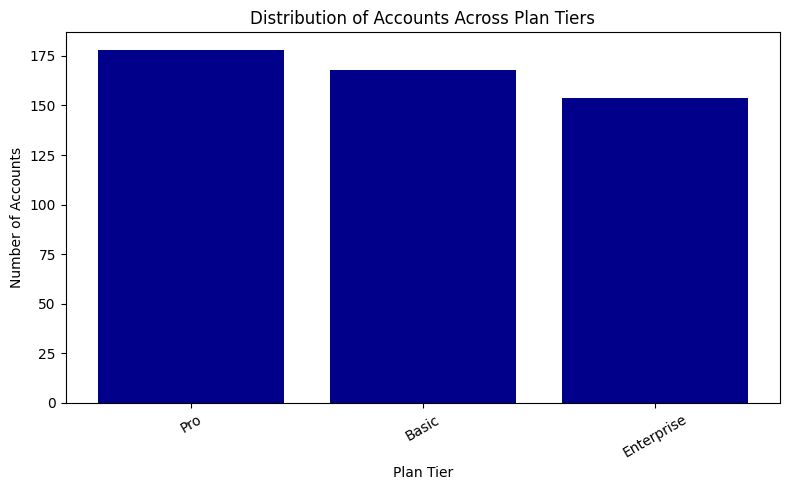

In [53]:
plt.figure(figsize=(8, 5))
plt.bar(plan_counts.index, plan_counts.values, color="darkblue")
plt.title("Distribution of Accounts Across Plan Tiers")
plt.xlabel("Plan Tier")
plt.ylabel("Number of Accounts")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Q.2::How are account signups trending over time (monthly growth)?


In [54]:
monthly_signups = (
    accounts_df
    .set_index("signup_date")
    .resample("M")
    .size()
    .reset_index(name="signup_count")
)
print(monthly_signups)

   signup_date  signup_count
0   2023-01-31            17
1   2023-02-28            18
2   2023-03-31            20
3   2023-04-30            15
4   2023-05-31            26
5   2023-06-30            13
6   2023-07-31            14
7   2023-08-31            16
8   2023-09-30            23
9   2023-10-31            20
10  2023-11-30            25
11  2023-12-31            20
12  2024-01-31            16
13  2024-02-29            13
14  2024-03-31            27
15  2024-04-30            22
16  2024-05-31            22
17  2024-06-30            21
18  2024-07-31            26
19  2024-08-31            21
20  2024-09-30            25
21  2024-10-31            31
22  2024-11-30            32
23  2024-12-31            17


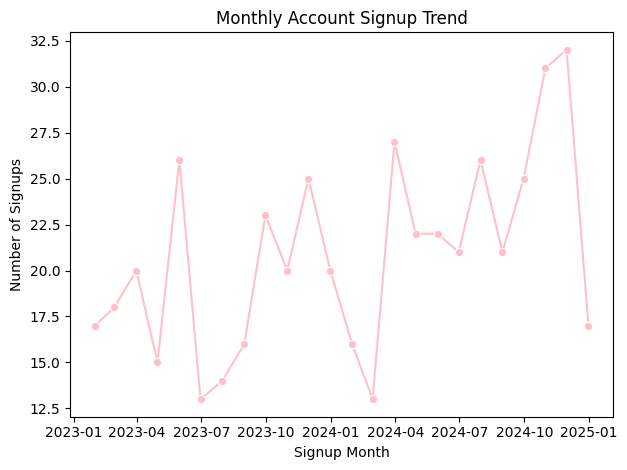

In [55]:
sns.lineplot(
    data=monthly_signups,
    x="signup_date",
    y="signup_count",
    color="pink",
    marker="o"
)

plt.title("Monthly Account Signup Trend")
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()

## Q.3::What proportion of accounts started as trial vs non-trial?

In [56]:
trial_counts = accounts_df["is_trial"].value_counts()
print(trial_counts)

is_trial
False    403
True      97
Name: count, dtype: int64


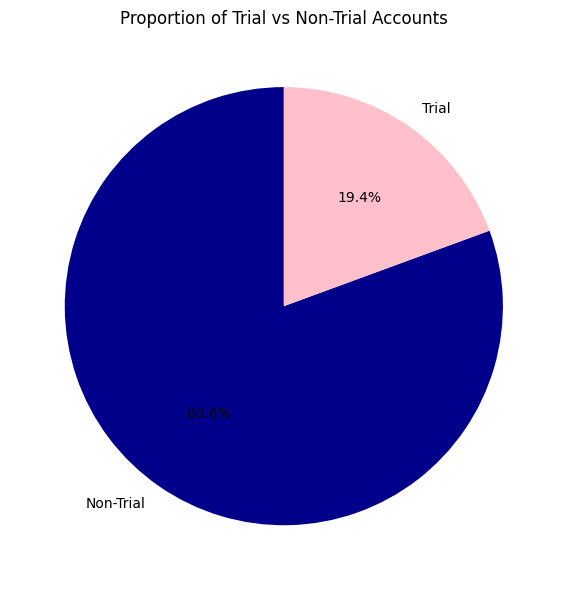

In [57]:
plt.figure(figsize=(6, 6))
plt.pie(
    trial_counts.values,
    labels=["Non-Trial", "Trial"],
    autopct="%1.1f%%",
    colors=["darkblue", "pink"],
    startangle=90
)
plt.title("Proportion of Trial vs Non-Trial Accounts")
plt.tight_layout()
plt.show()

## Q.4::How is monthly revenue (MRR) distributed across subscriptions?

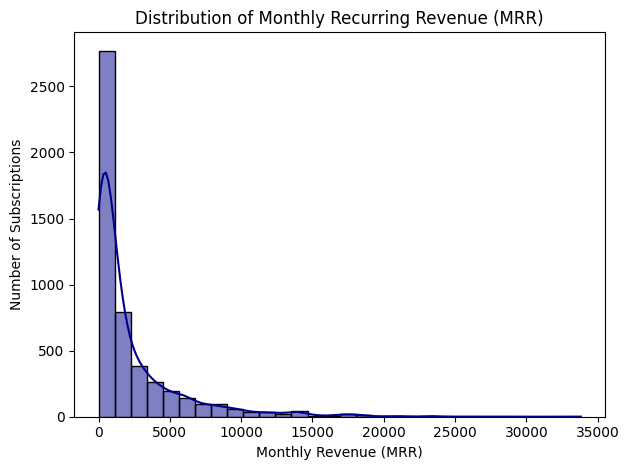

In [59]:
sns.histplot(
    data=subscriptions_df,
    x="mrr_amount",
    bins=30,
    color="darkblue",
    kde=True
)

plt.title("Distribution of Monthly Recurring Revenue (MRR)")
plt.xlabel("Monthly Revenue (MRR)")
plt.ylabel("Number of Subscriptions")
plt.tight_layout()
plt.show()

## Q.5::Which features are used most frequently by users?


In [60]:
feature_usage = (
    feature_usage_df
    .groupby("feature_name")["usage_count"]
    .sum()
    .sort_values(ascending=False)
)
print (feature_usage)

feature_name
feature_32    6686
feature_15    6621
feature_6     6546
feature_20    6541
feature_34    6536
feature_12    6534
feature_11    6533
feature_2     6525
feature_38    6478
feature_26    6470
feature_17    6458
feature_39    6430
feature_31    6425
feature_36    6389
feature_24    6388
feature_10    6384
feature_37    6380
feature_4     6374
feature_22    6366
feature_1     6364
feature_29    6362
feature_30    6309
feature_33    6274
feature_16    6273
feature_27    6231
feature_40    6222
feature_28    6213
feature_9     6207
feature_7     6113
feature_13    6099
feature_25    6091
feature_8     6030
feature_21    5950
feature_3     5917
feature_19    5900
feature_14    5880
feature_18    5850
feature_35    5816
feature_5     5759
feature_23    5601
Name: usage_count, dtype: int64


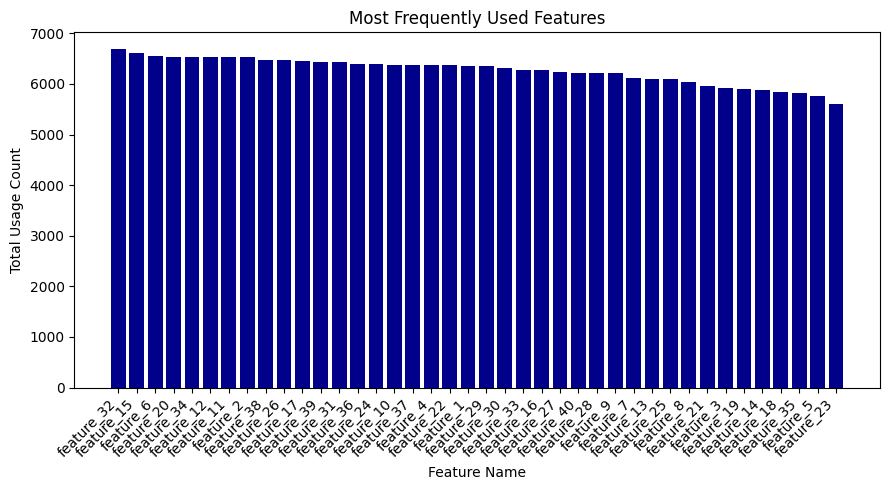

In [61]:
plt.figure(figsize=(9, 5))
plt.bar(feature_usage.index, feature_usage.values, color="darkblue")
plt.title("Most Frequently Used Features")
plt.xlabel("Feature Name")
plt.ylabel("Total Usage Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Q.6::How does feature usage intensity vary across different features?

In [66]:
feature_intensity = (
    feature_usage_df
    .groupby("feature_name")["usage_count"]
    .sum()
    .reset_index()
    .sort_values(by="usage_count", ascending=False)
)
print(feature_intensity)

   feature_name  usage_count
25   feature_32         6686
6    feature_15         6621
36    feature_6         6546
12   feature_20         6541
27   feature_34         6536
3    feature_12         6534
2    feature_11         6533
11    feature_2         6525
31   feature_38         6478
18   feature_26         6470
8    feature_17         6458
32   feature_39         6430
24   feature_31         6425
29   feature_36         6389
16   feature_24         6388
1    feature_10         6384
30   feature_37         6380
33    feature_4         6374
14   feature_22         6366
0     feature_1         6364
21   feature_29         6362
23   feature_30         6309
26   feature_33         6274
7    feature_16         6273
19   feature_27         6231
34   feature_40         6222
20   feature_28         6213
39    feature_9         6207
37    feature_7         6113
4    feature_13         6099
17   feature_25         6091
38    feature_8         6030
13   feature_21         5950
22    feature_

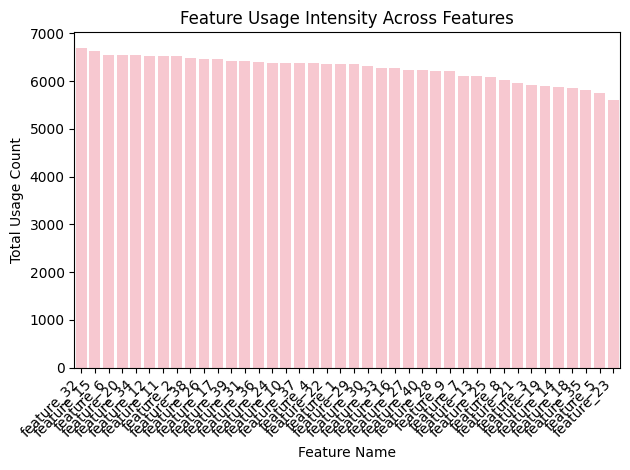

In [67]:
sns.barplot(
    data=feature_intensity,
    x="feature_name",
    y="usage_count",
    color="pink"
)

plt.title("Feature Usage Intensity Across Features")
plt.xlabel("Feature Name")
plt.ylabel("Total Usage Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Q.7::What is the distribution of session duration across different features??

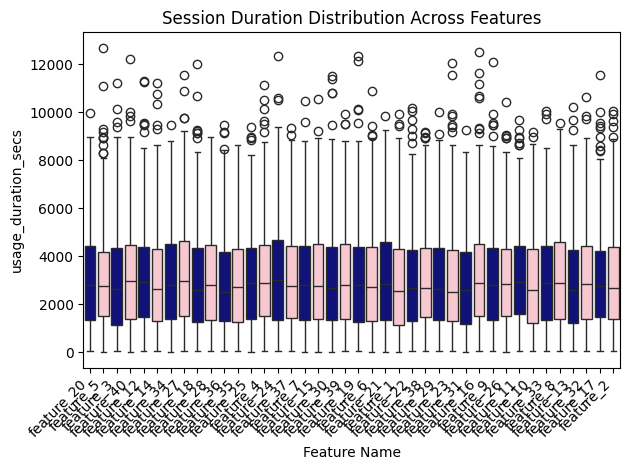

In [70]:


sns.boxplot(
    data=feature_usage_df,
    x="feature_name",
    y="usage_duration_secs",
    palette=["darkblue", "pink"]
)

plt.title("Session Duration Distribution Across Features")
plt.xlabel("Feature Name")
plt.ylabel("usage_duration_secs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [71]:
from sqlalchemy import create_engine

# --------------------------------
# PostgreSQL Connection Details
# --------------------------------

username = "postgres"
password = "Papu1993"
host     = "localhost"
port     = "5432"
database = "raven_stack.db"

# --------------------------------
# Create SQLAlchemy Engine
# --------------------------------

engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)

print("Database connection established successfully.")

# --------------------------------
# Load DataFrames into PostgreSQL
# --------------------------------

accounts_df.to_sql(
    name="accounts",
    con=engine,
    if_exists="replace",
    index=False
)
print("Data successfully loaded into table: accounts")


subscriptions_df.to_sql(
    name="subscriptions",
    con=engine,
    if_exists="replace",
    index=False
)
print("Data successfully loaded into table: subscriptions")


feature_usage_df.to_sql(
    name="feature_usage",
    con=engine,
    if_exists="replace",
    index=False
)
print("Data successfully loaded into table: feature_usage")


churn_events_df.to_sql(
    name="churn_events",
    con=engine,
    if_exists="replace",
    index=False
)
print("Data successfully loaded into table: churn_events")


support_tickets_df.to_sql(
    name="support_tickets",
    con=engine,
    if_exists="replace",
    index=False
)
print("Data successfully loaded into table: support_tickets")


Database connection established successfully.
Data successfully loaded into table: accounts
Data successfully loaded into table: subscriptions
Data successfully loaded into table: feature_usage
Data successfully loaded into table: churn_events
Data successfully loaded into table: support_tickets
